# Numerically solving the Schrodinger Equation

This python notebook will show a simple method to find solutions to the Schrodinger equation using what is called the shooting method. Recall that the Schrodinger equation can be written as:

$$ -\frac{\hbar^2}{2 m} \frac{\partial^2 \psi}{\partial x^2} +(V(x)- E) \psi =0 $$

where $V(x)$ is the potential and both the energy $E$ and the wavefunction $\psi$ are unknown.
The fact that we do not know the eigenvalue $E$ means that we have to use trial and error to guess a value for $E$ and the numerically solve Schrodinger's equation to find $\psi(x)$. We will know if our solution is correct if the wavefunction approaches 0 for large $x$.

To proceed we first change our units so that $\hbar^2/2 m=1$ and then add in a new variable $\phi$ which represents the derivative of $\psi$ to give us the set of first order differential equations:

$$ \begin{align}
    \frac{d \psi}{d x} &= \phi(x) \\
    \frac{d \phi}{d x} &= (V(x)-E) \psi(x)
    \end{align} $$

Recall that we did the same trick in the Cyclotron Motion notebook to convert the 2nd order differential equations into a set of first order differential equations. This means that we can use the inbuilt functions such as 'odeint' to automatically solve the equations for us.

So first as usual we import the required libraries

In [9]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

from scipy.integrate import odeint

Next we define the range over which we want to find the solutions. For the example below this is taken to be between $-20< x <20$ and we split it up into 2000 points.

In [10]:
start_position=-20.0
end_position=20   #set this to be the correct end point.
space_steps=2000
step=(end_position-start_position)/(space_steps-1)
space=np.linspace(start_position,end_position,space_steps)

Next we define our potential function. This can be an arbitrary function but here I have taken it to be a square well with a negative depth and lying symmetrically about $x=0$.

In [11]:
def potential(x,depth,width):  #square well potential
    pot=0.0
    if abs(x)<=width/2:
        pot=depth
    else:
        pot=0.0
    return pot

Now we define the derivatives functions for the equations above. These are the equations that we want to solve.

In [12]:
def shoot(yin,position,depth,width,energy):
    return np.array([yin[1],(potential(position,depth,width)-energy)*yin[0]])

Now we still don't know the initial values for $\psi(-20)$ and $\phi(-20)$ since we don't know the energy eigenvalue. However the Schrodinger equation is linear which means that we are free to set $\psi(-20)=1$ since if $\psi(x)$ is a solution so is $\alpha \psi(x)$ for any complex number $\alpha$. We also know that $\psi(x)$ decays exponentially if the energy is less than the potential and that the rate of decay is given by $V(x)-E$. Thus we can approximate the derivative of $psi(x)$ (i.e. $\phi(x)$) as $\phi(x) \approx (V(x)-E) \psi(x)$.

We then guess an energy level $E_g$ which means that the initially
$\phi(-20)=(V(-20)-E_g)$. Since for the square well potential $V(-20)=0$ this just becomes $\phi(-20)=-E_g$.

The Shooting method thus involves guessing an initial value of the energy and integrating the equations to see if it that value is correct. To see this in action let us use a potential well with a depth of -5 and a width of 30. This ensures that there are plenty of solutions to the Schrodinger equation. Our first guess will be that E=-4.9896. 

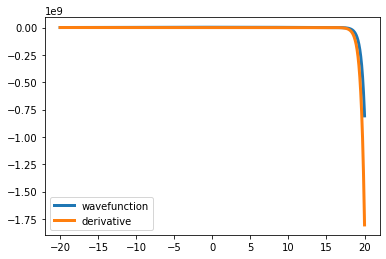

In [13]:
energy_guess=-4.9896  #this is our initial guess.
start=np.array([1.0,-energy_guess])

xout=odeint(shoot,start,space,args=(-5.0,30,energy_guess))
xt=np.transpose(xout)
psi=xt[0]
psiprime=xt[1]

plt.figure()
plt.plot(space,psi,linewidth=3,label='wavefunction')
plt.plot(space,psiprime,linewidth=3,label='derivative')
plt.legend()
plt.show()

Notice that the solution is clearly wrong since it heads towards $-\infty$ for large $x$. So
we can amend our guess of the energy for something larger and try again.

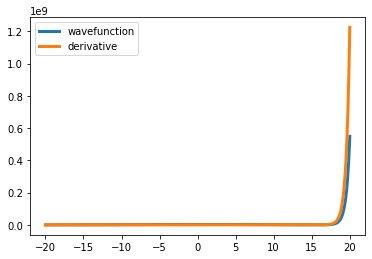

In [14]:
energy_guess=-4.9897  #this is our second guess.
start=np.array([1.0,-energy_guess])

xout=odeint(shoot,start,space,args=(-5.0,30,energy_guess))
xt=np.transpose(xout)
psi=xt[0]
psiprime=xt[1]

plt.figure()
plt.plot(space,psi,linewidth=3,label='wavefunction')
plt.plot(space,psiprime,linewidth=3,label='derivative')
plt.legend()
plt.show()


Now the solution is still wrong but it heads towards $+\infty$ for large $x$. We can thus say that the correct value for the energy must lie between our two solutions and all we have to do is find it. Trial and error leads to the solution below.

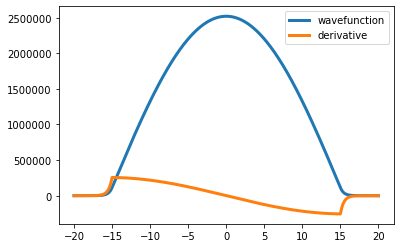

In [15]:
energy_guess=-4.989659756171312  #this is ground state
start=np.array([1.0,-energy_guess])

xout=odeint(shoot,start,space,args=(-5.0,30,energy_guess))
xt=np.transpose(xout)
psi=xt[0]
psiprime=xt[1]

plt.figure()
plt.plot(space,psi,linewidth=3,label='wavefunction')
plt.plot(space,psiprime,linewidth=3,label='derivative')
plt.legend()
plt.show()

Note that as expected the ground state wavefunction has a single maximum and goes to zero as the distance from the well increases. If we wanted to we could normalise the wavefunction so that the area under the curve was one but for now we will look at other solutions. A bit more trial and error leads to the next guess for the energy of the first higher order state.

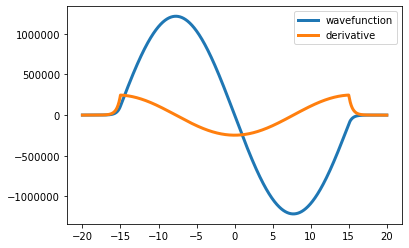

In [16]:
energy_guess=-4.95864151237514  #this is first higher order state
start=np.array([1.0,-energy_guess])

xout=odeint(shoot,start,space,args=(-5.0,30,energy_guess))
xt=np.transpose(xout)
psi=xt[0]
psiprime=xt[1]
plt.figure()
plt.plot(space,psi,linewidth=3,label='wavefunction')
plt.plot(space,psiprime,linewidth=3,label='derivative')
plt.legend()
plt.show()

It very quickly gets complicated to continually bisect the interval to find new
solutions. However it is fairly easy to write a program that does that for us. There are lots of different ways of doing so since it is the same as finding the zero of a function but this is perhaps the simplest. We start with two values $E_1$ and $E_2$ which have the property that
the solution to the equation goes to $\pm \infty$ for the two values and then we look at the
sign of the solution at the midpoint.

If the sign of the solution at the midpoint is the same value as $E_1$ we replace $E_1$ by
$(E_1+E_2)/2$ and start again. Otherwise we replace $E_2$ by the midpoint and start again. 
Each time we do this the size of the interval decreases by a factor of 2 so we can continue doing it for as long as we like. In practice we stop when we run out of numerical precision.


In [17]:
def find(start,stop): #make sure that the solution goes in different directions for the two values of start and stop
    out1=odeint(shoot,np.array([1.0,start]),space,args=(-5.0,30,start))[-1][0]
    #out1 is the final value of our trial solution for the guess Energy=start
    # the element [-1][0] picks the last element in the array.
    out2=odeint(shoot,np.array([1.0,stop]),space,args=(-5.0,30,stop))[-1][0]
    #out2 is the final value of our trial solution for the guess Energy=stop.
    guess=(stop+start)/2.0
    #guess is the midpoint of the interval.
    out3=odeint(shoot,np.array([1.0,guess]),space,args=(-5.0,30,guess))[-1][0]
    #out3 is the final value of the trial solution for the guess Energy=guess.
    print(out1,out2,out3) #prints out the three values. Check that two of them have different signs.
    count=1
    while count<50:
        if np.sign(out1)==np.sign(out3):
            start=guess
        else:
            stop=guess
        out1=odeint(shoot,np.array([1.0,start]),space,args=(-5.0,30,start))[-1][0]
        out2=odeint(shoot,np.array([1.0,stop]),space,args=(-5.0,30,stop))[-1][0]
        guess=(stop+start)/2.0
        out3=odeint(shoot,np.array([1.0,guess]),space,args=(-5.0,30,guess))[-1][0]
        print(out1,out2,out3)
        count=count+1
    return guess

Let us see it in action

In [18]:
find(-4.90,-4.91)

3017157085.367703 -1488721157.6751328 907699261.0260235
907699261.0260235 -1488721157.6751328 -261401555.8847637
907699261.0260235 -261401555.8847637 331371480.6051831
331371480.6051831 -261401555.8847637 36928602.6327268
36928602.6327268 -261401555.8847637 -111764989.27813512
36928602.6327268 -111764989.27813512 -37298344.358756356
36928602.6327268 -37298344.358756356 -154677.68537378384
36928602.6327268 -154677.68537378384 18394540.219054118
18394540.219054118 -154677.68537378384 9121623.380339025
9121623.380339025 -154677.68537378384 4484022.385920381
4484022.385920381 -154677.68537378384 2164787.3561655935
2164787.3561655935 -154677.68537378384 1004925.6042926874
1004925.6042926874 -154677.68537378384 424972.10375108715
424972.10375108715 -154677.68537378384 135111.13238121656
135111.13238121656 -154677.68537378384 -9770.428800546533
135111.13238121656 -9770.428800546533 62821.2645162628
62821.2645162628 -9770.428800546533 26474.387481207268
26474.387481207268 -9770.428800546533 85

-4.906952798962594

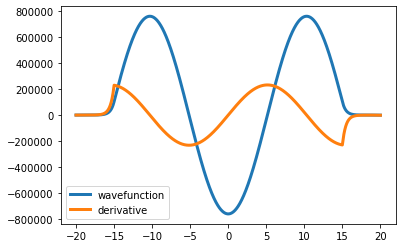

In [19]:
energy_guess=-4.906952798962594  #this is 2nd higher order state
start=np.array([1.0,-energy_guess])

xout=odeint(shoot,start,space,args=(-5.0,30,energy_guess))
xt=np.transpose(xout)
psi=xt[0]
psiprime=xt[1]
plt.figure()
plt.plot(space,psi,linewidth=3,label='wavefunction')
plt.plot(space,psiprime,linewidth=3,label='derivative')
plt.legend()
plt.show()

In [20]:
find(-4.80,-4.90)

-4722982155.803635 3017157085.367703 3644517724.8830185
-4722982155.803635 3644517724.8830185 -1986229942.4400694
-1986229942.4400694 3644517724.8830185 664398818.885519
-1986229942.4400694 664398818.885519 -737706816.3640819
-737706816.3640819 664398818.885519 -52098561.277820334
-52098561.277820334 664398818.885519 302820375.6614286
-52098561.277820334 302820375.6614286 124459119.31465241
-52098561.277820334 124459119.31465241 35946462.74768223
-52098561.277820334 35946462.74768223 -8135558.151578826
-8135558.151578826 35946462.74768223 13890764.072653009
-8135558.151578826 13890764.072653009 2873808.451028525
-8135558.151578826 2873808.451028525 -2631632.931605917
-2631632.931605917 2873808.451028525 120813.50348482178
-2631632.931605917 120813.50348482178 -1255499.5788772139
-1255499.5788772139 120813.50348482178 -567478.2433713758
-567478.2433713758 120813.50348482178 -223271.08395805047
-223271.08395805047 120813.50348482178 -51322.461502839724
-51322.461502839724 120813.50348482

-4.834606398105997

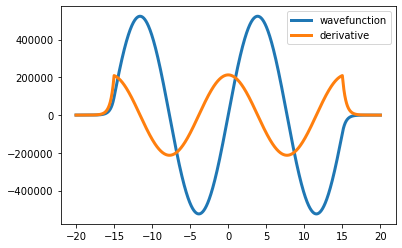

In [21]:
energy_guess=-4.834606398105997  #which state is this?
start=np.array([1.0,-energy_guess])

xout=odeint(shoot,start,space,args=(-5.0,30,energy_guess))
xt=np.transpose(xout)
psi=xt[0]
psiprime=xt[1]
plt.figure()
plt.plot(space,psi,linewidth=3,label='wavefunction')
plt.plot(space,psiprime,linewidth=3,label='derivative')
plt.legend()
plt.show()

## Simple Harmonic Potential

In class we have also looked at a harmonic potential well defined by

$$ V(x) =\frac{x^2}{w^2} $$

where $w$ defines the steepness of the well. We can easily adapt our code to find the wavefunctions for this case as well.  

In [22]:
def potential(x,width):  #harmonic potential well
    return x*x/(width*width)

def shoot(yin,position,width,energy):
    return np.array([yin[1],(potential(position,width)-energy)*yin[0]])

In [23]:
def find_harmonic(start,stop,width): #make sure that the solution goes in different directions for the two values of start and stop
    out1=odeint(shoot,np.array([1.0,potential(-20,width)-start]),space,args=(width,start))[-1][0]
    #out1 is the final value of our trial solution for the guess Energy=start
    # the element [-1][0] picks the last element in the array.
    out2=odeint(shoot,np.array([1.0,potential(-20,width)-stop]),space,args=(width,stop))[-1][0]
    #out2 is the final value of our trial solution for the guess Energy=stop.
    guess=(stop+start)/2.0
    #guess is the midpoint of the interval.
    out3=odeint(shoot,np.array([1.0,potential(-20,width)-guess]),space,args=(width,guess))[-1][0]
    #out3 is the final value of the trial solution for the guess Energy=guess.
    print(out1,out2,out3) #prints out the three values. Check that two of them have different signs.
    count=1
    while count<50:
        if np.sign(out1)==np.sign(out3):
            start=guess
        else:
            stop=guess
        out1=odeint(shoot,np.array([1.0,potential(-20,width)-start]),space,args=(width,start))[-1][0]
        out2=odeint(shoot,np.array([1.0,potential(-20,width)-stop]),space,args=(width,stop))[-1][0]
        guess=(stop+start)/2.0
        out3=odeint(shoot,np.array([1.0,potential(-20,width)-guess]),space,args=(width,guess))[-1][0]
        print(out1,out2,out3)
        count=count+1
    return guess

In [24]:
find_harmonic(0,0.2,10)

5.0201383839734714e+17 -3125212648653843.5 -384102462.1876018
5.0201383839734714e+17 -384102462.1876018 8.179017955151048e+16
8.179017955151048e+16 -384102462.1876018 2.2735542460311012e+16
2.2735542460311012e+16 -384102462.1876018 8410199084143735.0
8410199084143735.0 -384102462.1876018 3609208269503528.0
3609208269503528.0 -384102462.1876018 1670918860379850.0
1670918860379850.0 -384102462.1876018 803802150803844.9
803802150803844.9 -384102462.1876018 394198592114886.0
394198592114886.0 -384102462.1876018 195199516651800.16
195199516651800.16 -384102462.1876018 97127887432922.77
97127887432922.77 -384102462.1876018 48446233851932.05
48446233851932.05 -384102462.1876018 24193597310250.742
24193597310250.742 -384102462.1876018 12089281720052.924
12089281720052.924 -384102462.1876018 6042618784911.379
6042618784911.379 -384102462.1876018 3020660087803.171
3020660087803.171 -384102462.1876018 1510024184243.1016
1510024184243.1016 -384102462.1876018 754791579975.5231
754791579975.5231 -38

0.09999999922386975

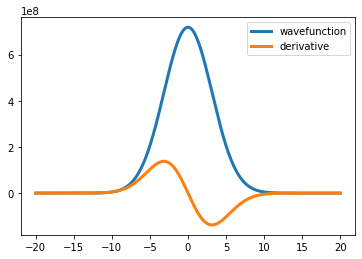

In [25]:
energy_guess=0.09999999922386982  #this is a higher order state
start=np.array([1.0,potential(-20,10)-energy_guess])

xout=odeint(shoot,start,space,args=(10,energy_guess))
xt=np.transpose(xout)
psi=xt[0]
psiprime=xt[1]
plt.figure()
plt.plot(space,psi,linewidth=3,label='wavefunction')
plt.plot(space,psiprime,linewidth=3,label='derivative')
plt.legend()
plt.show()

It can be seen that this looks like the ground state solution to Schrodinger's equation. It is symmetric about $x=0$ and has a single maximum. Note that as before the solution is un-normalised. This is not a major issue since it can be handled by just dividing the solution by an appropiate factor.

If our method works then we should be able to find the next solution which will be anti-symmetric with $\psi(0)=0$ and have two extrema. So lets try a new guess.

In [26]:
find_harmonic(0.1,0.5,10)

-384102462.1876018 296197.98766152654 -6477297.217795363
-6477297.217795363 296197.98766152654 59861035832003.46
-6477297.217795363 59861035832003.46 107060199690817.53
-6477297.217795363 107060199690817.53 93390716526662.66
-6477297.217795363 93390716526662.66 60663938464424.32
-6477297.217795363 60663938464424.32 34436673456375.676
-6477297.217795363 34436673456375.676 18328664980746.496
-6477297.217795363 18328664980746.496 9452929477653.213
-6477297.217795363 9452929477653.213 4800011019612.841
-6477297.217795363 4800011019612.841 2418569519148.3726
-6477297.217795363 2418569519148.3726 1213945480628.1665
-6477297.217795363 1213945480628.1665 608141165405.1974
-6477297.217795363 608141165405.1974 304359518018.6893
-6477297.217795363 304359518018.6893 152250177820.7762
-6477297.217795363 152250177820.7762 76140448337.71689
-6477297.217795363 76140448337.71689 38071227916.57752
-6477297.217795363 38071227916.57752 19033511306.56135
-6477297.217795363 19033511306.56135 9513802022.6091

0.3000000010381232

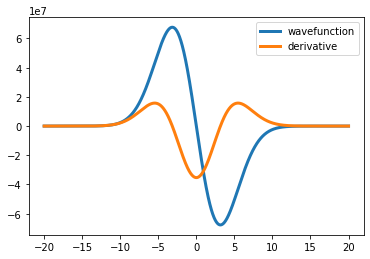

In [27]:
energy_guess=0.3000000010381232  #this is the second eigenvalue
start=np.array([1.0,potential(-20,10)-energy_guess])

xout=odeint(shoot,start,space,args=(10,energy_guess))
xt=np.transpose(xout)
psi=xt[0]
psiprime=xt[1]
plt.figure()
plt.plot(space,psi,linewidth=3,label='wavefunction')
plt.plot(space,psiprime,linewidth=3,label='derivative')
plt.legend()
plt.show()

Again our code has found the solution that we expect. We can see that it is quite a bit wider than the fundamental solution. We can carry on and find the next solution.

In [28]:
find_harmonic(0.4,0.6,10)

59861035832003.46 -1961884369626.1562 296197.98766152654
296197.98766152654 -1961884369626.1562 -3136916629505.5293
296197.98766152654 -3136916629505.5293 -2575830852326.186
296197.98766152654 -2575830852326.186 -1621298470266.7778
296197.98766152654 -1621298470266.7778 -905660254960.2147
296197.98766152654 -905660254960.2147 -478126888035.0189
296197.98766152654 -478126888035.0189 -245585108719.60425
296197.98766152654 -245585108719.60425 -124448038960.54208
296197.98766152654 -124448038960.54208 -62640941945.26467
296197.98766152654 -62640941945.26467 -31424879707.666275
296197.98766152654 -31424879707.666275 -15738406402.658878
296197.98766152654 -15738406402.658878 -7875625969.774823
296197.98766152654 -7875625969.774823 -3939177748.3140407
296197.98766152654 -3939177748.3140407 -1969870192.504501
296197.98766152654 -1969870192.504501 -984852819.5584898
296197.98766152654 -984852819.5584898 -492174324.9449932
296197.98766152654 -492174324.9449932 -245863802.8279699
296197.987661526

0.5000000018347055

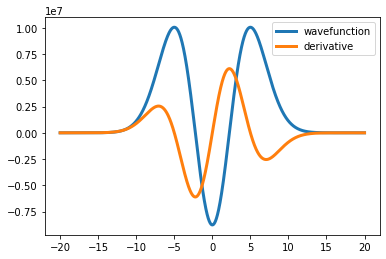

In [29]:
energy_guess=0.5000000018347055  #this is a higher order state
start=np.array([1.0,potential(-20,10)-energy_guess])

xout=odeint(shoot,start,space,args=(10,energy_guess))
xt=np.transpose(xout)
psi=xt[0]
psiprime=xt[1]
plt.figure()
plt.plot(space,psi,linewidth=3,label='wavefunction')
plt.plot(space,psiprime,linewidth=3,label='derivative')
plt.legend()
plt.show()

We know for the harmonic potential the eigenvalues are evenly spaced. In our case the spacing is about 0.2 so we expect the next solution to be at 0.7.

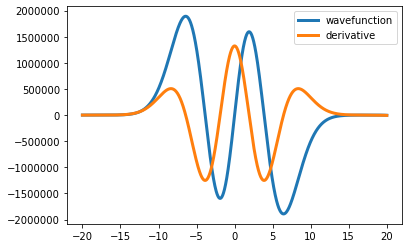

In [30]:
energy_guess=0.7  #no need to use find now since we know the energy spacing.
start=np.array([1.0,potential(-20,10)-energy_guess])

xout=odeint(shoot,start,space,args=(10,energy_guess))
xt=np.transpose(xout)
psi=xt[0]
psiprime=xt[1]
plt.figure()
plt.plot(space,psi,linewidth=3,label='wavefunction')
plt.plot(space,psiprime,linewidth=3,label='derivative')
plt.legend()
plt.show()